In [1]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab24-TH](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab24/Lab24-TH.ipynb)

___

# <font color=green>Exercise Set 24: "Predictor-Response Data Models"</font>

**Medrano, Giovanni**

**R11521018**

ENGR 1330 Exercise Set 24 - Homework

## Exercise: Building a Dive Computer

![](TechDiving_NOAA.png)

| Diver with Computer |
|---|

### Background 
Scuba divers circa 1980's used to memorize dive tables which provided safe depth-duration combinations (e.g. 60 feet for 60 minutes).  Commerical divers used similar tables. A bounce would occur when a diver at depth notices a shiny object and descends deeper for a very short interval to recover the object - usually something worthless, but occassionally something very valuable. Bounce dives can be quite dangerous - more so if the diver is trying to adapt a memorized dive table to his/her current situation, hence the development of dive computers.

The US Navy started development of dive computers in the 1950's to relieve the human of the somewhat tricky task of multi-level dive planning and monitoring. The first digital dive computer was a laboratory model, the XDC-1, based on a desktop electronic calculator, converted to run a DCIEM four-tissue algorithm in 1975. It used pneumofathometer depth input from surface-supplied divers. In 1976 the diving equipment company Dacor developed and marketed a digital dive computer which used a **table lookup** based on stored US Navy tables rather than a real-time tissue gas saturation model. The Dacor Dive Computer (DDC), displayed output on light-emitting diodes for: current depth; elapsed dive time; surface interval; maximum depth of the dive; repetitive dive data; ascent rate, with a warning for exceeding 20 metres per minute; warning when no-decompression limit is reached; battery low warning light; and required decompression. In the subsequent decade several firms developed and marketed dive computers; by 1989, the advent of dive computers had not met with what might be considered widespread acceptance. Combined with the general mistrust, at the time, of taking a piece of electronics that your life might depend upon underwater, there were also objections expressed ranging from dive resorts felt that the increased bottom time would upset their boat and meal schedules, to that experienced divers felt that the increased bottom time would, regardless of the claims, result in many more cases of decompression sickness.

By 2015 sophisticated dive computers using real-time tissue gas saturation models were commonplace and comparatively inexpensive (circa 2020 computers are programmable for exotic gasses - greatly relieving the diver's workload in planning and monitoring multi-level (bounce) dives).

![](HELOX.png)

|Helium-Oxygen Dive Computer Readout|
|---|

### Problem Statement

Using the data below develop a data-model for a dive computer that uses Dacor's original approach (i.e. table lookup in this case replaced by an data model). The table lists allowable time at prescribed depths for a recreational diver with a safety decompression stop at 10 feet depth.

![](DiveTable.png)

<!--|Depth (feet)|Time (minutes) with Safety Stop|Time (minutes) without Safety Stop|
|---|---|---|
35 |205|139|
40 |140|104|
50 |80|63|
60 |55|47|
70 |45|33|
80 |35|25|
90 |25|21|
100 |22|none|
110 | 16|none|
120| 13|none|
130| 10|none|
140| 8|none|-->


### Build a Data Model:

Build a predictor-response type data model.


<hr/><hr/> 

**Part 1:** <hr/>

Make a data model using **Depth** as a predictor of **Time** ($Time = \beta_{0}+\beta_{1}*Depth$) for a dive with and without safety stops<br> Plot your models and the data on the same plot. Report your values of the parameters.

In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

df = pd.read_csv("lab24th.csv")
# read data file
# summarize contents + markdown cell as needed
df.describe()


,Depth (feet,Time with Safety Stop
count,12.000000,12.000000
mean,85.416667,54.500000
std,35.384790,60.569269
min,35.000000,8.000000
25%,57.500000,15.250000
50%,85.000000,30.000000
75%,112.500000,61.250000
max,140.000000,205.000000


In [3]:
df.head()

,Depth (feet,Time with Safety Stop,Time without Safety Stop
0,35,205,139
1,40,140,104
2,50,80,63
3,60,55,47
4,70,45,33


array([ 35,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140],
      dtype=int64)

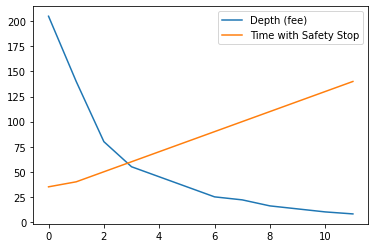

In [8]:
# 
fig, ax = plt.subplots()
tdaSet = np.array(df['Depth (feet'])
tpeakSet = np.array(df['Time with Safety Stop'])

data = pd.DataFrame({'Depth (fee)':tpeakSet, 'Time with Safety Stop':tdaSet})

data.plot(ax=ax)
tdaSet

Please enter an input for b0 1
Please enter an input for b1 2


<AxesSubplot:>

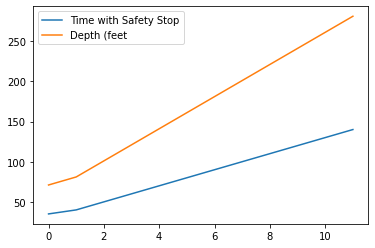

In [12]:
b0 = int(input('Please enter an input for b0'))
b1 = int(input('Please enter an input for b1'))

sorted_df = df.sort_values(by = 'Depth (feet')
sorted_df.head()

#print(range(0,len(sorted_df)))

fig, ax = plt.subplots()
sortedTdaPeakSet = np.array(sorted_df['Depth (feet'])

sortedTdaSet = [] #np.array(sorted_df['TDA'])

for i in (range(0 , len(sorted_df))):
    #print(i)
    #print(sorted_df['TDA'][i])
    
    sortedTdaSet.append(b0 + b1* sorted_df['Depth (feet'][i])
data = pd.DataFrame({'Time with Safety Stop':sortedTdaPeakSet, 'Depth (feet':sortedTdaSet})

data.plot(ax=ax)

array([ 35,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140],
      dtype=int64)

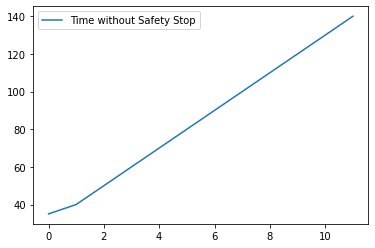

In [13]:
# 
fig, ax = plt.subplots()
tdaSet = np.array(df['Depth (feet'])
tpeakSet = np.array(df['Time without Safety Stop'])

data = pd.DataFrame({'Depth (fee)':tpeakSet, 'Time without Safety Stop':tdaSet})

data.plot(ax=ax)
tdaSet

Please enter an input for b0 1
Please enter an input for b1 2


<AxesSubplot:>

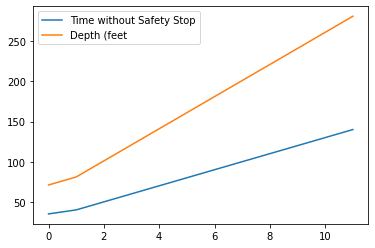

In [14]:
b0 = int(input('Please enter an input for b0'))
b1 = int(input('Please enter an input for b1'))

sorted_df = df.sort_values(by = 'Depth (feet')
sorted_df.head()

#print(range(0,len(sorted_df)))

fig, ax = plt.subplots()
sortedTdaPeakSet = np.array(sorted_df['Depth (feet'])

sortedTdaSet = [] #np.array(sorted_df['TDA'])

for i in (range(0 , len(sorted_df))):
    #print(i)
    #print(sorted_df['TDA'][i])
    
    sortedTdaSet.append(b0 + b1* sorted_df['Depth (feet'][i])
data = pd.DataFrame({'Time without Safety Stop':sortedTdaPeakSet, 'Depth (feet':sortedTdaSet})

data.plot(ax=ax)

<hr/><hr/> 

**Part 2:**

<hr/>

Make a data model using **Depth** as a predictor of **Time** ($Time = \beta_{0}+\beta_{1}*log(Depth)$) for a dive with and without safety stops. <br> Plot your models and the data on the same plot. Report your values of the parameters.

In your opinion which mapping of **Depth**  (arithmetic or logarithmic) produces a more useful graph? 

Please enter an input for b0 1
Please enter an input for b1 2


<AxesSubplot:>

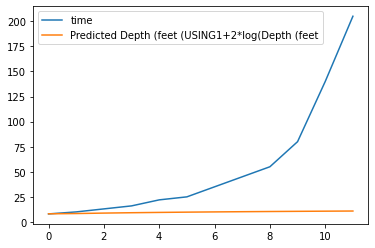

In [15]:
b0 = int(input('Please enter an input for b0'))
b1 = int(input('Please enter an input for b1'))

sorted_df = df.sort_values(by = 'Time with Safety Stop')
sorted_df.head()

#print(range(0,len(sorted_df)))

fig, ax = plt.subplots()
sortedTdaPeakSet = np.array(sorted_df['Time with Safety Stop'])

sortedTdaSet = [] #np.array(sorted_df['TDA'])

for i in (range(0 , len(sorted_df))):
    #print(i)
    #print(sorted_df['TDA'][i])
    
    sortedTdaSet.append(b0 + b1*math.log(sorted_df['Depth (feet'][i]))
data = pd.DataFrame({'time':sortedTdaPeakSet, 'Predicted Depth (feet (USING'+ str(b0)+ '+'+str(b1)+'*log(Depth (feet':sortedTdaSet})

data.plot(ax=ax)

Please enter an input for b0 1
Please enter an input for b1 2


<AxesSubplot:>

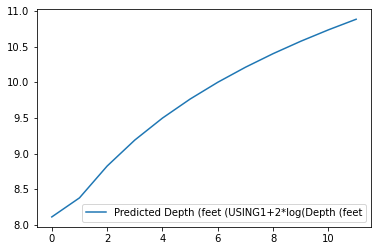

In [16]:
b0 = int(input('Please enter an input for b0'))
b1 = int(input('Please enter an input for b1'))

sorted_df = df.sort_values(by = 'Time without Safety Stop')
sorted_df.head()

#print(range(0,len(sorted_df)))

fig, ax = plt.subplots()
sortedTdaPeakSet = np.array(sorted_df['Time without Safety Stop'])

sortedTdaSet = [] #np.array(sorted_df['TDA'])

for i in (range(0 , len(sorted_df))):
    #print(i)
    #print(sorted_df['TDA'][i])
    
    sortedTdaSet.append(b0 + b1*math.log(sorted_df['Depth (feet'][i]))
data = pd.DataFrame({'time':sortedTdaPeakSet, 'Predicted Depth (feet (USING'+ str(b0)+ '+'+str(b1)+'*log(Depth (feet':sortedTdaSet})

data.plot(ax=ax)

<hr/><hr/> 

**Part 3:**

<hr/>

Using your preferred model, report the time a diver can spend at 65 feet with and without a safety stop.

In [ ]:
It appears it is very hard to reach 65 feet without a safety stop as itll take a amount of time off the charts.